In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/predictions0.01vs0_time_cross.tsv', sep="\t")
print(df)

   project_ids  sample_ids genders  doses  target  prediction  \
0    SRP161461  SRR7817611    male   0.00       0           0   
1    SRP161461  SRR7817612    male   0.00       0           0   
2    SRP161461  SRR7817614    male   0.00       0           0   
3    SRP161461  SRR7817615    male   0.00       0           0   
4    SRP161461  SRR7817616    male   0.00       0           0   
..         ...         ...     ...    ...     ...         ...   
86   SRP090688  SRR4317611    male   0.00       0           0   
87   SRP090688  SRR4317612    male   0.00       0           0   
88   SRP090688  SRR4317613    male   0.01       1           0   
89   SRP090688  SRR4317615    male   0.01       1           1   
90   SRP090688  SRR4317616    male   0.01       1           1   

    confidence_class_0  confidence_class_1  
0             0.973361            0.026639  
1             0.987577            0.012423  
2             0.909193            0.090808  
3             0.966497            0.033

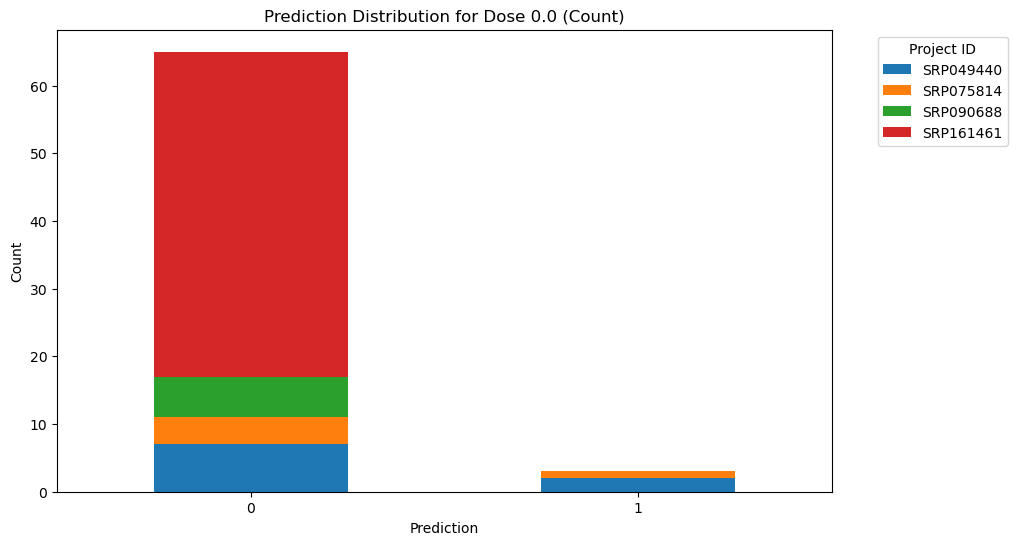

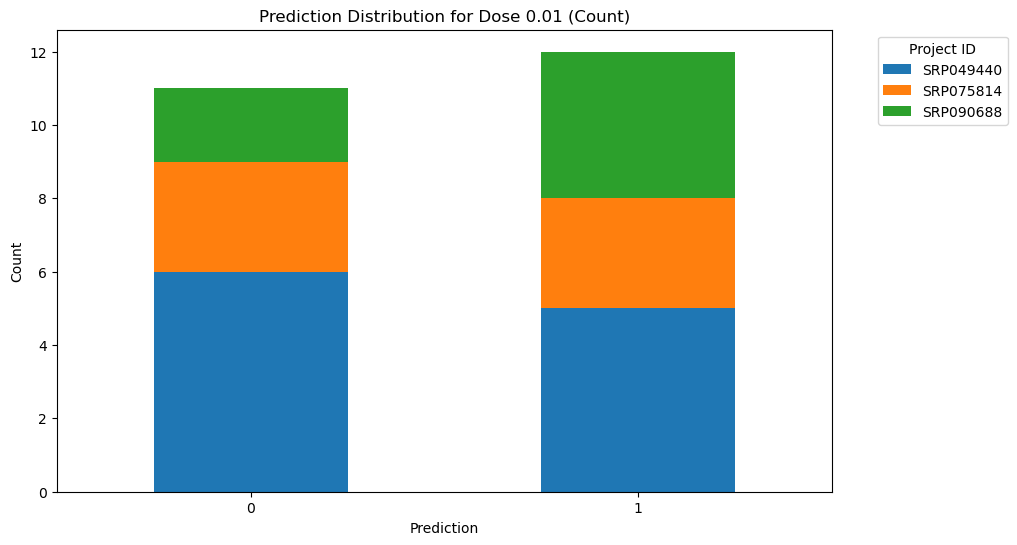

In [ ]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


In [4]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_00.01vs0_time_cross.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_10.01vs0_time_cross.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.001800  0.000408  R-MMU-9613507  R-MMU-9613545
1     0.021175  0.019224  R-MMU-9613545  R-MMU-9613562
2     0.004174  0.004271  R-MMU-9613562  R-MMU-9613670
3     0.014827  0.010971  R-MMU-9639715  R-MMU-9640117
4     0.000680  0.003448  R-MMU-9641089  R-MMU-9641096
...        ...       ...            ...            ...
8551  0.009027  0.003811  R-MMU-8856808  R-MMU-8856813
8552  0.066939  0.066727  R-MMU-8868651  R-MMU-8868648
8553  0.077272  0.072933  R-MMU-8868648  R-MMU-8868661
8554  0.067281  0.059771  R-MMU-8868660  R-MMU-8868658
8555  0.010687  0.010865  R-MMU-8863721  R-MMU-8863723

[8556 rows x 4 columns]


In [6]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig0_0.01vs0_time_cross.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig1_0.01vs0_time_cross.csv', sep='\t',index=False)

